# _Cancer Screening_
Student Number: C16470866

Name: Andrew McGowan

Course: Computer Science 

Program: Image Processing Assignment 2

## Research

### Watershed Algorithm:
The watershed algorithm allows you to take images with a lot of noise and objects of similar type and be able to distinctly  draw the images apart. I felt this woulld be a great method to implement to my program as the images all have very similar cells which would be hard to tell apart from a computer point of view. **[2]** 

The method builds barriers between the similar objects or places of potential barriers following the lines on the image. No extra imports are needed as numpy, cv2 and matplotlib are already in all my programs. 

This algorithm follows a specific set of steps which allow you to draw these objects apart. 
* First you threshold the image which will allow you to see the obvious difference in black and white. 
* Next you need to block out all the noise that is in between the objects in the image. This can simply mean shaving down the sides of the images to allow more distinct separation between them.**[2]**

* This is followed by getting the sure background area by dilation and finding the sure foreground are using "distanceTransform" and thresholding. 

* Once you have both grounds you can find the unknow region by subtracting one from the other. You then have the regions of the cells which can then be marked by a marker which will heavily outline where the edges of the object are.

### Click Events:
The second resource I needed was click events. This was to allow me to click on the image and manipulate the image to how I wish. **[1]**

Here I studied the code and how parameters are passed and how I can access the pixel X and Y values. From studying the site I was able to figure out exactly what I needed to do for mine which was implement a click event for the left button on the mouse. From there I was easily able to access the X and Y value which I can use for taking that section of the image

I also got learned the 5 parameters that it passes which are:
* **event**: The event that took place (left mouse click etc.)
* **x**: The x coordinate on the image
* **y**: The y coordinate on the image
* **flags**: Any relevant flags passed by OpenCV
* **params**: Any extra parameters supplied by OpenCV
**[1]**

I also found out through this only page that I was able to carry the global variables with me as it gets awkward when trying to pass images etc through this process


## The Algorithm

The process in which I attempted to complete this assignment was all based around the ability to click the image and close in on image allowing the user to interact. 
#### The Process of my Program:
* My global variable are to facilitate which image is being used after the click

* First my program has hardcoded images into it. These images are then passed into process_image. The call is at the bottom

* In process_image the image_click_identifier is used to identify which image is being used. Before I created this I had a lot of difficulty trying tell the program after the image is clicked which image is actually being used. Noramlly this would be fine with simple functions however, with the click event I could not pass the image parameter into it (im sure there is a way but I could not figure it out). So i made the global strings to be able to do an if statement in the click event.

* After the image_click_identifier was set I called the "watershed". The current image is passed to this method and put through the watershed algorithm steps which are: **[2]**
1. Split the images values to and create and image with the rgb values
2. Convert the image to greyscale
3. Threshold the image at your chosen values to detect difference between background and foreground
4. Remove the noise in the image
5. Use whatever form or Morphology you like on the image
6. Dilate the background
* After that I plotted the images alongside their updated version

* After the watershed method has run we move towards the interaction with the image

* I created a window that would contain the current image, this is alongside the current image name which I have given as a global variable and will go wherever the image goes.

* I used "WINDOW_AUTOSIZE" as I had issues with the window being too small. **[3]** At this stage the current image should be open in a window. I gave the "setMouseCallback" to pass the current image and the function "click" which is where all the code for clicking the image is.

* In the code for clicking the image I have it set for "EVENT_LBUTTONDOWN". This method is run when the left button on the mouse is pressed over the image. I get the current height and width of the image using "img.shape[:2]". From there I create variables named that are to take the area clicked and create a new image with.

* These variables are relative to the sie of the current image.

* I then crop the current image using the method of " crop = image[y:y + h : x:x + h] ". I came across some errors with this that were quickly resolved when I manually gave the variable integer values. I then got the width and height of the new sectioned image of the cell and simply doubled its size for better view. 

**processed_image = clicked_image(croppedImage)** is now called passing the cropped image. In this method we run through the cropped image and black out the background only showing the current cell.

* Here we threshold the image trying to take the foreground or object on the image away from the background. The following steps are followed in this and the reference is the Segmentation notes on Brightspace.

1. Create a mask with a value range
2. Convert to RGB
3. Inverse the mask by taking it away from its max value of 255
4. create a shape for the desired elliptical kernal
5. Execute morphology with "morph_open" this is one of many forms of morphology that you can use.
6. Execute the same but this time "morph_close"
7. Create a region of interest
8. Apply markers and watershed
I let the result equal the region of interest and returned the result to the function call. This was done after converting the image back to BGR.

**Back in click  event**

Back in the click event the window will now be updated every time you click the image and the image should have a black background around the cell.

Every time you click an area on the image the whole call will run again refreshing the window for the cropped image where selected.


**Program Efficiency** 
For all thresholding i only use 3 iterations. This is to keep the program running smoothly as well as quickly. At the same time is is giving a better result for the threshold. After some trial and error I realised that any more than 3 for my program was only giving the same result 

**Out of bounds** 
Is for any area that may conflict with the cropped image

### References

**[1]**
Rosebrock, A., 2020. Capturing Mouse Click Events With Python And Opencv - Pyimagesearch. [online] PyImageSearch. Available at: 
<https://www.pyimagesearch.com/2015/03/09/capturing-mouse-click-events-with-python-and-opencv/> [Accessed 23 November 2020].

**[2]**
Docs.opencv.org. 2020. Opencv: Image Segmentation With Watershed Algorithm. [online] Available at: <https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html> [Accessed 23 November 2020].

**[3]**
display, O., ARATA, M. and Shakeel, S., 2020. Opencv & Python - Image Too Big To Display. [online] Stack Overflow. Available at: 
<https://stackoverflow.com/questions/35180764/opencv-python-image-too-big-to-display> [Accessed 23 November 2020].

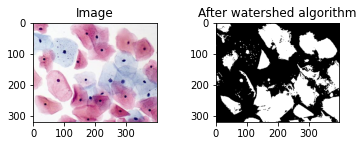

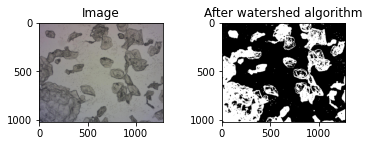

In [74]:
# imports

import cv2
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import image as image
import matplotlib.cm as cm

# global string

try:
    colour_image = "Colour Image .jpg"
    mono_image = "Mono Image .jpg"
    image_click_identifier = None
except:
    print("Failed to assign global strings")

    

def process_image(img, image_string):
    global image_click_identifier, mono_image, colour_image
    
    # assign image identifier for click 
    try:
        if image_string == colour_image:
            image_click_identifier = 1
        elif image_string == mono_image:
            image_click_identifier = 2
        else:
            print("Failed to select image identifier")
        
        # call watershed for current image displayed as plt
        watershed(img)
            
        # create initial window of image
        cv2.namedWindow(image_string, cv2.WINDOW_AUTOSIZE)

        # use name of current image for window 
        cv2.imshow(image_string, img)

        # set mouse callback awaiting for user to click image
        cv2.setMouseCallback(image_string, click) 
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    except:
        print("Failed to create initial window")
        

    
    
def clicked_image(img):
    # log for image being updated
    print("Image editing started")
    
    try:
        # convert to gray
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except:
        print("Could not convert image to Grayscale")
    
    # threshold value
    # create mask to separate cell from image
    t_value = 230
    thresh, mask = cv2.threshold(gray, thresh = t_value, maxval = 255, type = cv2.THRESH_BINARY)

    # convert to RGB
    image_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    # inverse the mask to negative by taking away from full color value of 255
    mask_negative = 255 - mask
    
    # pass shape and size for desired elliptical kernal
    # execute morphology with morph_open type of transfrom on kernal
    shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35,35))
    new_mask = cv2.morphologyEx(mask_negative, cv2.MORPH_OPEN, shape)

    # pass shape and size for desired elliptical size smaller than open
    # execute morphology with morph_close type of transfrom on kernal
    shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    new_mask = cv2.morphologyEx(new_mask, cv2.MORPH_CLOSE, shape)

    # region of interest 
    ROI = cv2.bitwise_and(image_RGB, image_RGB, mask = new_mask)
    
    # change color back to bgr to display true color 
    # return image
    result = cv2.cvtColor(ROI, cv2.COLOR_RGB2BGR)
    return result
    
    

    
# function for click on image 
def click(event, x, y, flags, param):
    
    # globals variables for identifier
    global image_click_identifier, mono_image, colour_image

    # if mouse clicked down
    if event == cv2.EVENT_LBUTTONDOWN:
        
        # check which image is being used
        if image_click_identifier == 1:
            img = cv2.imread('Cervical Colour.jpg')
        elif image_click_identifier == 2:
            img = cv2.imread('Cervical Mono.jpg')
        else:
            print("Failed to identify image on click")
            
        try:
            #get height and width
            height, width = img.shape[:2]
        
            # height diff for new image
            height_diff = height / 3
            width_diff = width / 3
        
            # get image by backtracing from where clicked
            height_start = y - (height / 7)
            width_start = x - (width / 8)
        except:
            print("Failed to use get image height and width")
            
        
        # error checking if new box is outside image 
        if height_start > 0 and width_start > 0:
            #convert all to int and create new image of cell 
            croppedImage = img[int(height_start):int(height_start) + 
                                  int(height_diff), int(width_start): 
                                  int(width_start) + int(width_diff)]
            
            try:
                # get height and width of cropped image
                # enlarge it
                height_cropped, width_cropped, depth = croppedImage.shape
                height_cropped = height_cropped * 2
                width_cropped = width_cropped *2
            
                # call function process_image
                processed_image = clicked_image(croppedImage)
            
                # take image from process image and display it 
                cv2.namedWindow("Processed Image", cv2.WINDOW_NORMAL)
            
                # correct image window size
                cv2.resizeWindow("Processed Image", width_cropped, height_cropped)
            
                # show edited image
                cv2.imshow("Processed Image", processed_image)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                
            except:
                print("Failed to create new modified window")
                
        else:
            print("Out of bounds")
   
  
    
def watershed(img):
    global image_click_identifier, mono_image, colour_image
    
    try:
        # split image 
        b, g, r = cv2.split(img)
        image_rgb = cv2.merge([r, g, b])

        # convert current image to gray
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except:
        print("Failed to convert and extract image values - watershed")
      
    try:
        # thresholf the value range of the image to detect difference in background and foreground
        ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # remove noise in image 
        kernel = np.ones((2,2), np.uint8)

        # use open and close form of morphing as we did with click
        opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 3)

        # dilate background area 
        background_image = cv2.dilate(opening, kernel, iterations=3)
    except:
        print("Failed to use Watershed steps")
        
    try: # check which image is being used
        if image_click_identifier == 1:
            cv2.imwrite(colour_image, gray)
        elif image_click_identifier == 2:
            cv2.imwrite(mono_image, gray) 
    except:
        print("Failed to create image file")
        

    # plot images together
    try:
        plt.subplot(221),plt.imshow(image_rgb)
        plt.title('Image')
        plt.subplot(222),plt.imshow(thresh, 'gray')
        plt.title("After watershed algorithm")
        plt.show()  
    except:
        print("Failed to plot watershed images")
    
       
try:
    Colour = cv2.imread('Cervical Colour.jpg')
    Mono = cv2.imread('Cervical Mono.jpg')
except:
    print("Failed to load images")

try:
    process_image(Colour, colour_image)
    process_image(Mono, mono_image)
except:
    print("Failed to run process")